# Testing Notebook

This notebook is used for the several tests and result gathering needed for our research. We use the code found in the [scripts]() folder to generate our data, simulate our Microgrid and evaluate the results.

## Importing the needed libraries and functions

In the upcoming cell we import all used libraries and functions that are used in this notebook.

In [1]:
from scripts.utils import generate_household_dataframe, generate_grid_prize_data
from scripts.model import MicroGrid
import pandas as pd

## Generating the data

In the next cell we will define the profile ratios that are being used to

In [2]:
# Defining the profile ratios
profile_ratios = {
    'early_bird': 0.2,
    'evening_person': 0.3,
    'base_profile': 0.4,
    'energy_saver': 0.1
}

# Creating the dataframes for the simulation
household_prosumption_data = generate_household_dataframe(
    n_days=366,
    n_households=30,
    profile_ratios=profile_ratios,
    seed=42
    )

production_data = pd.read_csv("data/solar_strength.csv", index_col="DATE")

grid_price_data = generate_grid_prize_data(
    n_days=366,
    seed=42
    )

In [3]:
# Initialising the simulation
simulation = MicroGrid(
    n=30, # Number of Agents, cannot be higher than the amount of Agents in the dataframe
    consumption_data=household_prosumption_data,
    production_data=production_data,
    grid_prize_data=grid_price_data,
    gini=0.1,
    mean_panels=8,
    bat_capacity=500,
    bat_c_rate=0.5,
    bat_efficiency=0.9,
    seed=42
)

In [4]:
# Running the simulation
simulation.long_step(n=365*24)

[DAILY PRICE UPDATE :: 02-01-2024]: Price: 0.1905 | Grid Price: 0.1976 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 03-01-2024]: Price: 0.1925 | Grid Price: 0.1972 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 04-01-2024]: Price: 0.1938 | Grid Price: 0.1969 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 05-01-2024]: Price: 0.1948 | Grid Price: 0.1971 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 06-01-2024]: Price: 0.1954 | Grid Price: 0.1967 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 07-01-2024]: Price: 0.1956 | Grid Price: 0.1963 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 08-01-2024]: Price: 0.1958 | Grid Price: 0.1962 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 09-01-2024]: Price: 0.1951 | Grid Price: 0.1951 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 10-01-2024]: Price: 0.1950 | Grid Price: 0.1950 | Battery charge level: 0.00
[DAILY PRICE UPDATE :: 11-01-2024]: Price: 0.1952 | Grid Price: 0.1956 | Battery charge level: 0.00


## Visualisation Ideas

- Energy demand vs supply over time
- Energy price fluctuations over time
- Individual household average energy production en consumption graph (voor tim en jasper)
- Trade Network graph
- Surplus/Defecit energy distribution across households
- Total energy production/consumption per time given (hour, day, week, month)
- Household solar panel distribution
- Trading Price dynamics (price vs surplus/deficit)
- Pressure vs Price
- Agent consumption and production over timespan (tim en jasper)

In [5]:
simulation._convert_to_dataframe()

sim_df = simulation.sim_df
agent_df = simulation.agent_df

In [6]:
sim_df.head()

,day,hour,grid_price,local_price,market_pressure,microgrid_demand,microgrid_supply,energy_delta,battery_state
0,01-01-2024,0,0.1974,0.1874,NaN,2.669802,0.0,-2.669802,0.0
1,01-01-2024,1,0.1974,0.1874,NaN,2.617553,0.0,-2.617553,0.0
2,01-01-2024,2,0.1974,0.1874,NaN,2.642785,0.0,-2.642785,0.0
3,01-01-2024,3,0.1974,0.1874,NaN,2.617604,0.0,-2.617604,0.0
4,01-01-2024,4,0.1974,0.1874,NaN,2.627173,0.0,-2.627173,0.0


In [7]:
agent_df.head()

,day,hour,agent_id,solarpanel_area,consumed,produced,traded,earnings
0,01-01-2024,0,20,8.5,0.099890,0.0,0.0,0.0
1,01-01-2024,0,15,8.2,0.085670,0.0,0.0,0.0
2,01-01-2024,0,11,7.9,0.093049,0.0,0.0,0.0
3,01-01-2024,0,27,8.8,0.102280,0.0,0.0,0.0
4,01-01-2024,0,23,8.6,0.082842,0.0,0.0,0.0


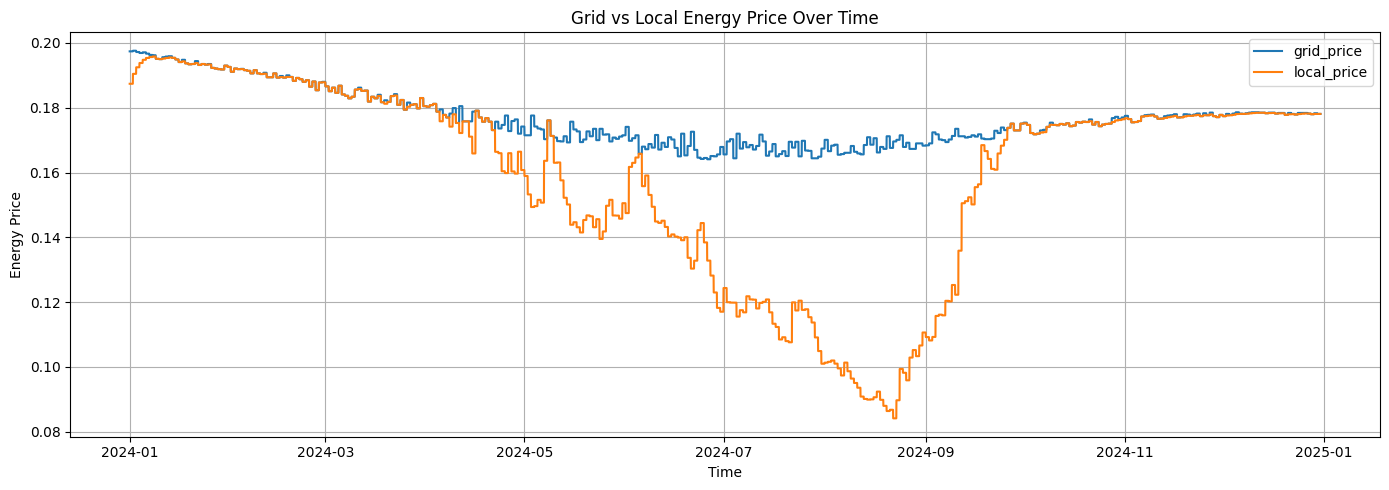

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'day' is a datetime object
sim_df["day"] = pd.to_datetime(sim_df["day"], format="%d-%m-%Y")

# Create a full datetime index for plotting
sim_df["timestamp"] = sim_df["day"] + pd.to_timedelta(sim_df["hour"], unit="h")

# Plot
plt.figure(figsize=(14, 5))
for col in ["grid_price", "local_price"]:
    plt.plot(sim_df["timestamp"], sim_df[col], label=col)

plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Grid vs Local Energy Price Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


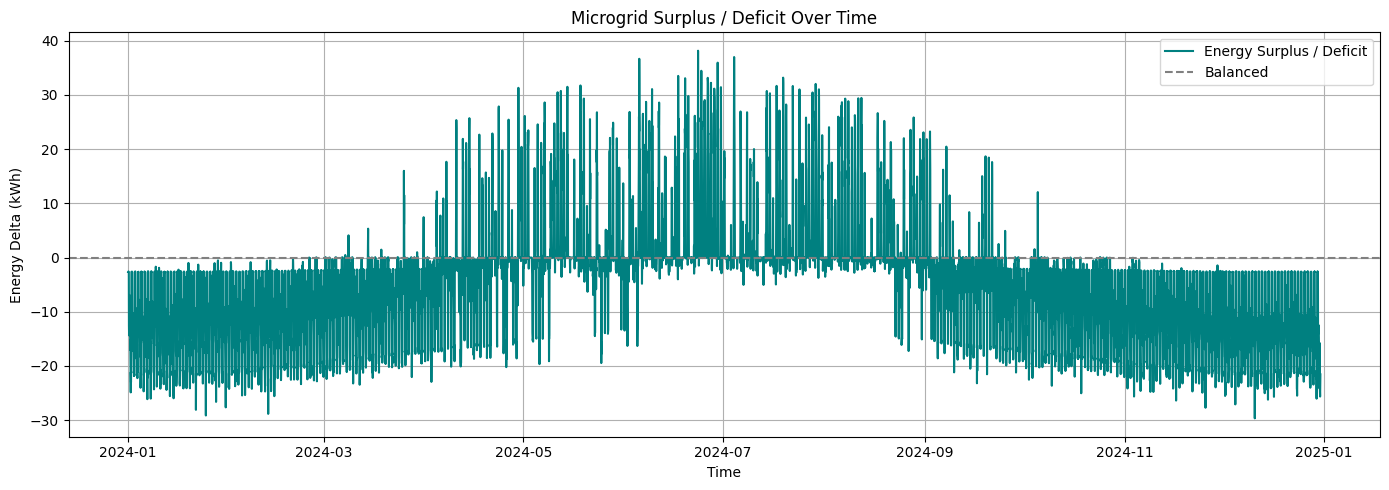

In [9]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(14, 5))
plt.plot(sim_df["timestamp"], sim_df["energy_delta"], label="Energy Surplus / Deficit", color="teal")
plt.axhline(0, color="gray", linestyle="--", label="Balanced")

plt.title("Microgrid Surplus / Deficit Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Delta (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

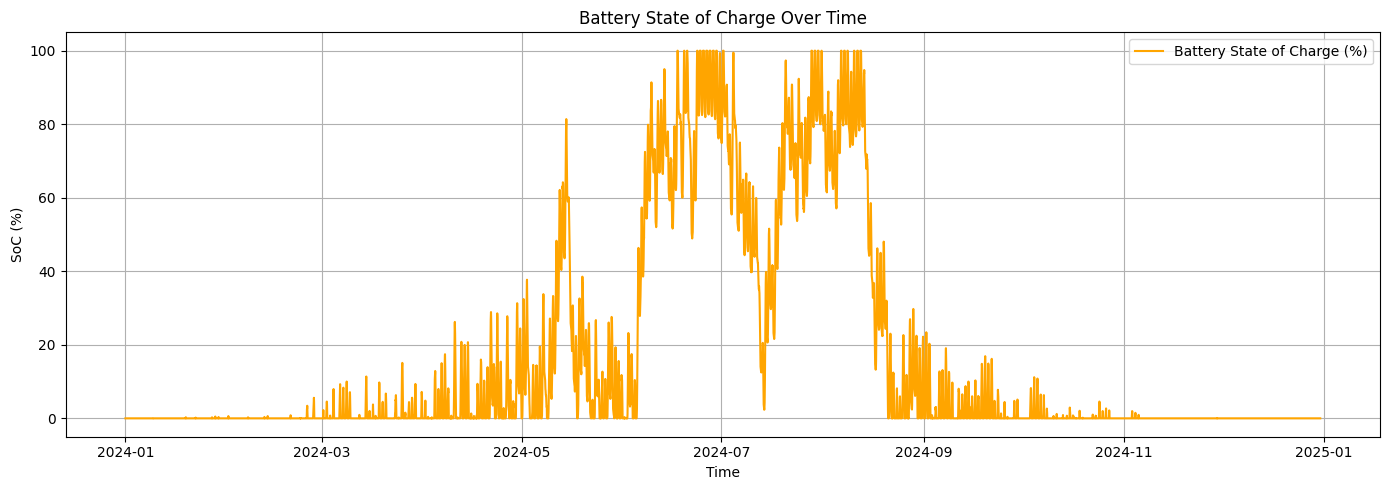

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(sim_df["timestamp"], sim_df["battery_state"], label="Battery State of Charge (%)", color="orange")

plt.title("Battery State of Charge Over Time")
plt.xlabel("Time")
plt.ylabel("SoC (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

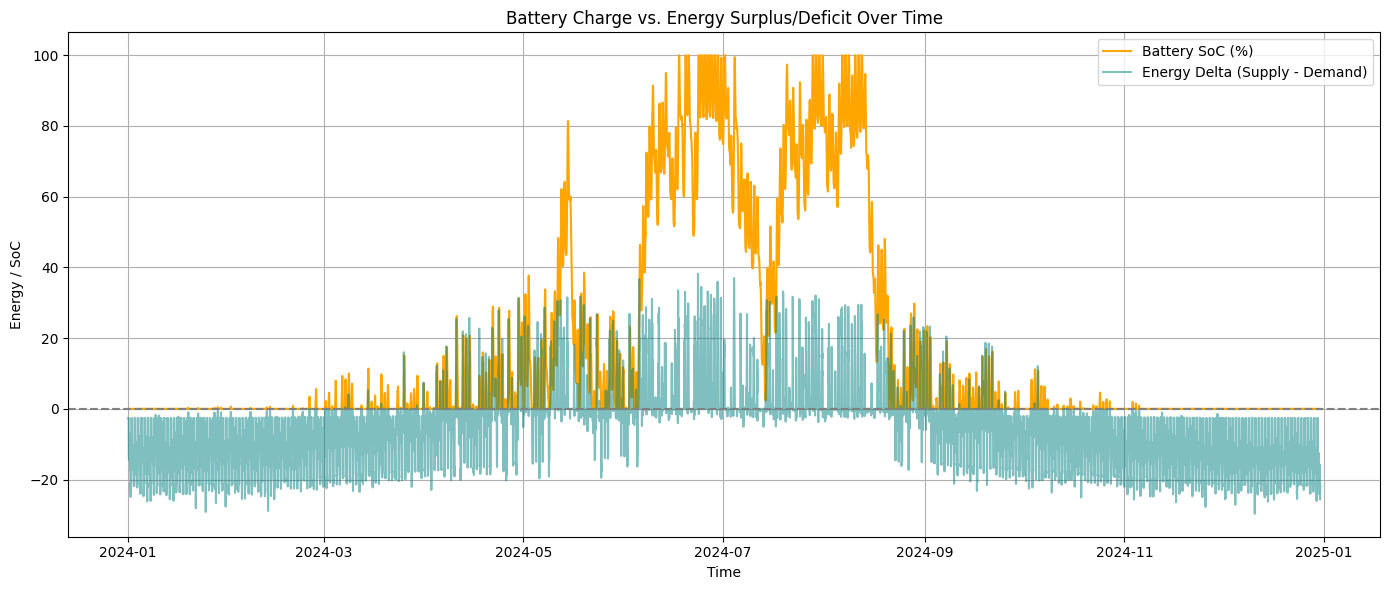

In [13]:
plt.figure(figsize=(14, 6))
plt.plot(sim_df["timestamp"], sim_df["battery_state"], label="Battery SoC (%)", color="orange")
plt.plot(sim_df["timestamp"], sim_df["energy_delta"], label="Energy Delta (Supply - Demand)", alpha=0.5, color="teal")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Battery Charge vs. Energy Surplus/Deficit Over Time")
plt.xlabel("Time")
plt.ylabel("Energy / SoC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

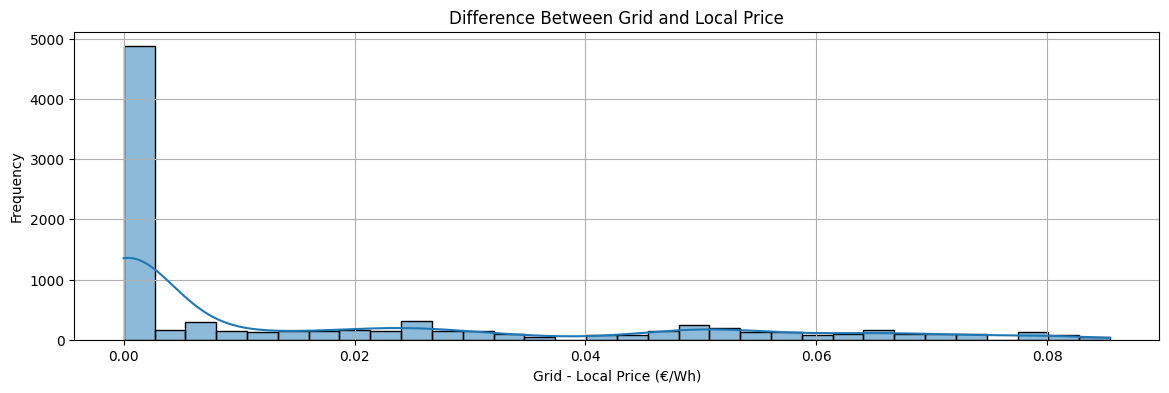

In [11]:
import seaborn as sns

sim_df["price_diff"] = sim_df["grid_price"] - sim_df["local_price"]

plt.figure(figsize=(14, 4))
sns.histplot(sim_df["price_diff"], kde=True)
plt.title("Difference Between Grid and Local Price")
plt.xlabel("Grid - Local Price (€/Wh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

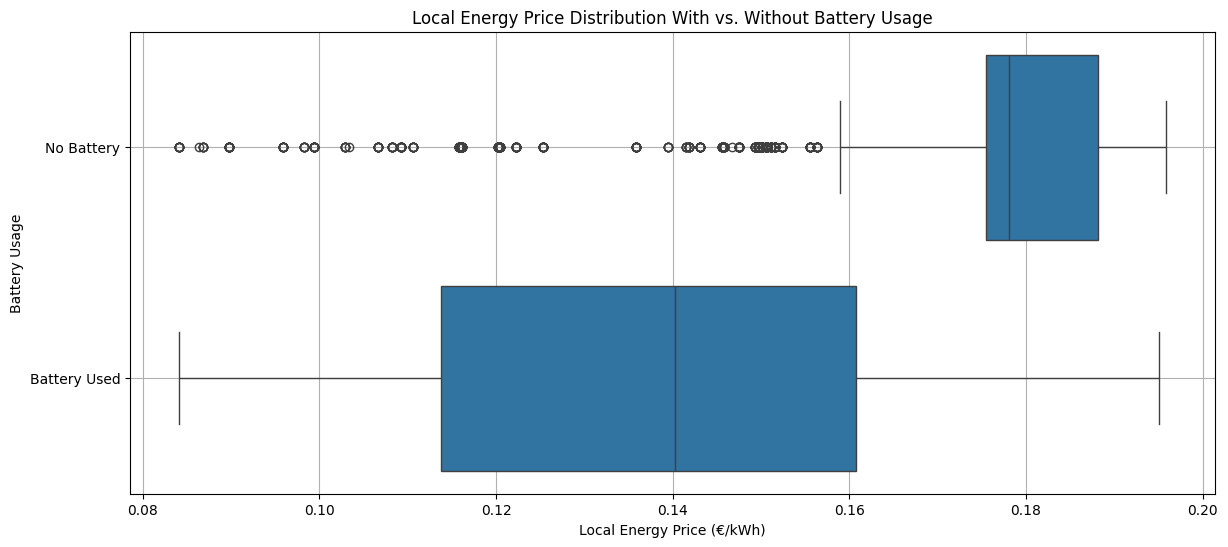

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column to classify usage
sim_df["battery_used"] = sim_df["battery_state"].apply(lambda soc: "Battery Used" if soc > 0 else "No Battery")

plt.figure(figsize=(14, 6))
sns.boxplot(y="battery_used", x="local_price", data=sim_df)
plt.title("Local Energy Price Distribution With vs. Without Battery Usage")
plt.ylabel("Battery Usage")
plt.xlabel("Local Energy Price (€/kWh)")
plt.grid(True)
plt.show()

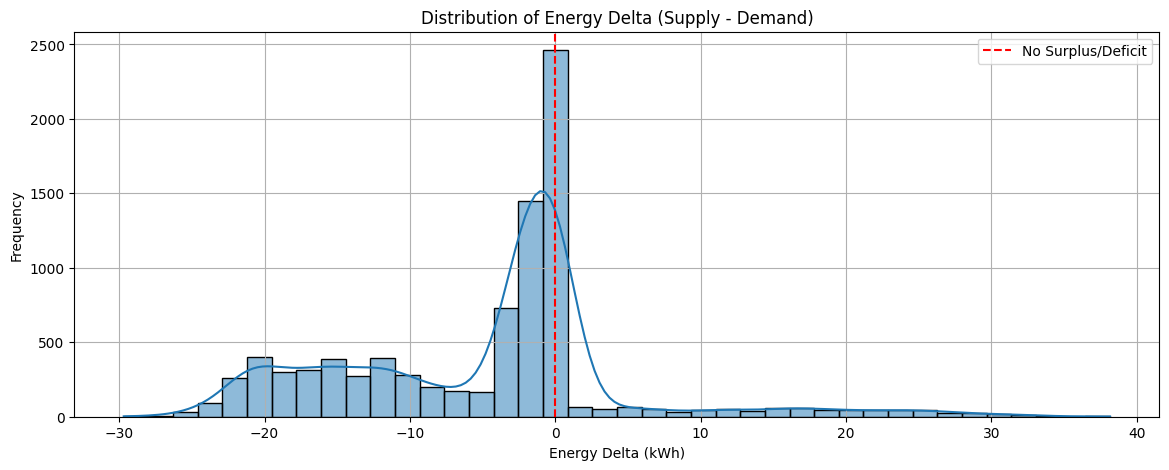

In [14]:
plt.figure(figsize=(14, 5))
sns.histplot(sim_df["energy_delta"], bins=40, kde=True)
plt.title("Distribution of Energy Delta (Supply - Demand)")
plt.xlabel("Energy Delta (kWh)")
plt.ylabel("Frequency")
plt.axvline(0, color="red", linestyle="--", label="No Surplus/Deficit")
plt.legend()
plt.grid(True)
plt.show()

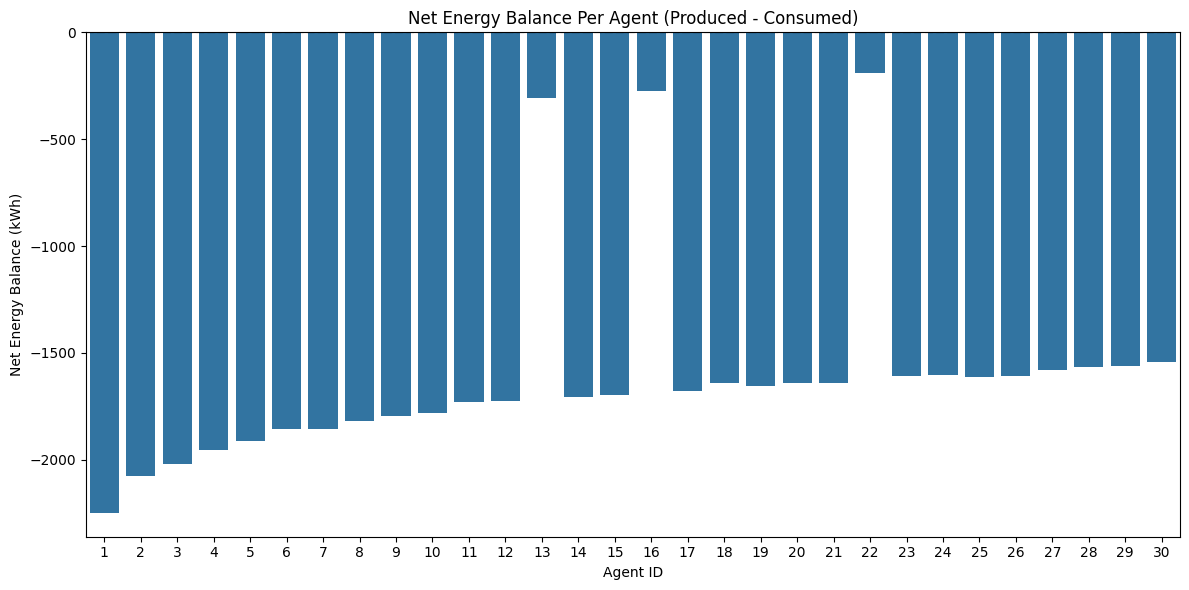

In [15]:
agent_summary = agent_df.groupby("agent_id")[["produced", "consumed"]].sum().reset_index()
agent_summary["net_balance"] = agent_summary["produced"] - agent_summary["consumed"]

plt.figure(figsize=(12, 6))
sns.barplot(data=agent_summary.sort_values("net_balance"), x="agent_id", y="net_balance", legend=False)
plt.axhline(0, color='black', linestyle='--')
plt.title("Net Energy Balance Per Agent (Produced - Consumed)")
plt.xlabel("Agent ID")
plt.ylabel("Net Energy Balance (kWh)")
plt.tight_layout()
plt.show()